In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
messages = pd.read_csv("SMSSpamCollection",sep = "\t",names = ['label','message'])

In [3]:
messages.head(5)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
messages['length'] = messages['message'].apply(len)

In [5]:
messages.head(5)

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


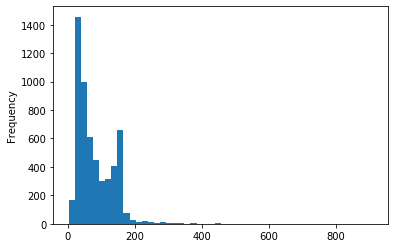

In [6]:
messages['length'].plot.hist(bins = 50)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001ACDA29CF48>,
      dtype=object)

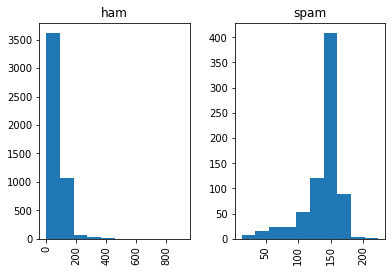

In [7]:
messages.hist(column = 'length',by = 'label')

Text(0, 0.5, 'Count')

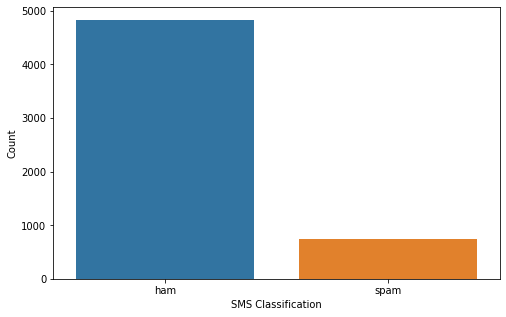

In [8]:
# Visualizing the count of 'spam' messages in the dataset
plt.figure(figsize=(8,5))
sns.countplot(x='label', data=messages)
plt.xlabel('SMS Classification')
plt.ylabel('Count')

In [9]:
import re
import nltk
nltk.download('stopwords') 
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0,messages.shape[0]):
     msg = message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=messages.message[i])
     msg = msg.lower()
     msg = msg.split()
     ps = PorterStemmer()
     msg = [ps.stem(words) for words in msg if not words in set(stopwords.words('english'))]
     msg = ' '.join(msg)
     corpus.append(msg)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Priyank\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
corpus[0:10]

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free']

In [30]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

# Extracting dependent variable from the dataset
y = pd.get_dummies(messages['label'])
y = y.iloc[:, 1].values


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [33]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [34]:
y_pred = classifier.predict(X_test)

In [35]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [36]:
cm

array([[946,   9],
       [  7, 153]], dtype=int64)

In [56]:
classifier = MultinomialNB(alpha=0.3)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.3, class_prior=None, fit_prior=True)

In [57]:
def text_process(txt):
    txt = re.sub(pattern='[^a-zA-Z]',repl=' ', string = txt)
    txt = txt.lower()
    txt_words = txt.split()
    txt_words = [word for word in txt_words if word not in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final = [ps.stem(word) for word in txt_words]
    final = ' '.join(final)
    
    temp = cv.transform([final]).toarray()
    return classifier.predict(temp)

In [58]:
sms = "Nah I don't think he goes to usf, he lives around here though"

if text_process(sms):
  print('This is a SPAM message!')
else:
  print('This is a normal message.')

This is a normal message.


In [59]:
sms ='SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info'

if text_process(sms):
  print('This is a SPAM message!')
else:
  print('This is a normal message.')

This is a SPAM message!
